In [54]:
# To support both python 2 and python 3
from __future__ import print_function, division, unicode_literals
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Usual imports
import numpy as np
import cv2
import json
import os


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import pandas as pd
print("Working dir:", os.getcwd())

Working dir: X:\Programming\Innovavi\parameter-prediction\v5


In [2]:
from os.path import join as path_join
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
DATASET_PATH = ""
PARAM_PATH = path_join(DATASET_PATH, "parameter set")
TRAIN_PATH = path_join(DATASET_PATH, "train set")
ANNOTATIONS_PATH = path_join(DATASET_PATH, "Annotations")

In [4]:
data_filename = "Data.txt"
vertex_filename = "vertex_3k.txt"

In [5]:
data_param_1_filepath = path_join(PARAM_PATH, "batch01", data_filename)
data_param_2_filepath = path_join(PARAM_PATH, "batch02", data_filename)

vertex_param_1_filepath = path_join(PARAM_PATH, "batch01", vertex_filename)
vertex_param_2_filepath = path_join(PARAM_PATH, "batch02", vertex_filename)

full_csv_train_1_filepath = path_join(ANNOTATIONS_PATH, "train_set-1-full.csv")

# Read data contents

In [6]:
with open(data_param_1_filepath) as f:
    data_contents = f.readlines()
    
data_contents

['{\n',
 "\t'id':0,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_0_Front',\n",
 "\t'Render_0_Side',\n",
 "\t'Render_0_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-1},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':1,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_1_Front',\n",
 "\t'Render_1_Side',\n",
 "\t'Render_1_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-0.96},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':2,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_2_Front',\n",
 "\t'Render_2_Side',\n",
 "\t'Render_2_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-0.9199999999999999},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':3,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\

# Read Vertex Contents

In [7]:
with open(vertex_param_1_filepath) as f:
    vertex_data = f.readlines()
    
vertex_data

['[\n',
 '"batch": ["batch=0","camera=Camera_Front","image=0"],\n',
 '"indexes":{\n',
 '"1;2":[267.820083618164,36.295166015625],\n',
 '"2;8":[269.466552734375,129.224975585938],\n',
 '"3;9":[269.893524169922,150.816909790039],\n',
 '"4;10":[269.470657348633,134.381317138672],\n',
 '"5;11":[267.939239501953,37.4105224609375],\n',
 '"6;13":[269.361999511719,82.7407073974609],\n',
 '"7;14":[269.382705688477,85.7810668945313],\n',
 '"8;15":[269.370422363281,99.5943908691406],\n',
 '"9;16":[269.374755859375,104.714340209961],\n',
 '"10;17":[269.268005371094,106.130111694336],\n',
 '"11;18":[269.284805297852,105.02751159668],\n',
 '"12;19":[269.511611938477,115.077651977539],\n',
 '"13;20":[269.510162353516,118.999526977539],\n',
 '"14;21":[269.490921020508,121.683364868164],\n',
 '"15;22":[269.330627441406,80.1631164550781],\n',
 '"16;35":[269.613540649414,202.527221679688],\n',
 '"17;36":[269.2001953125,37.815673828125],\n',
 '"18;37":[269.113098144531,29.3683929443359],\n',
 '"19;38":[26

# Read train csv

In [8]:
df = pd.read_csv(full_csv_train_1_filepath, index_col=0)
df

,id,batch_id,camera_type,dome rotation x,dome rotation y,dome rotation z,Brows Arch,Brows Centre Depth,Lip Upper Peak Height,1;2_x,...,2995;16530_x,2995;16530_y,2996;16531_x,2996;16531_y,2997;16532_x,2997;16532_y,2998;16533_x,2998;16533_y,2999;16534_x,2999;16534_y
0,0,0,Front,162.18,162.18,162.18,-0.6,-0.8,0.036022,202.269409,...,258.131271,254.345734,136.397369,254.345734,259.047867,255.745636,135.481140,255.745636,260.405624,256.678070
1,0,0,Angle,162.18,162.18,162.18,-0.6,-0.8,0.036022,312.865021,...,397.911057,236.383133,339.410080,234.935852,398.383957,237.586182,338.858246,236.203049,399.094681,238.411926
2,0,0,Side,162.18,162.18,162.18,-0.6,-0.8,0.036022,355.907684,...,413.182556,262.005768,427.185898,262.540833,413.067520,263.000397,427.316177,263.635437,412.903137,263.671326
3,1,0,Front,108.28,108.28,108.28,-0.6,-0.8,0.493784,277.435257,...,332.099030,290.365875,226.751648,290.365875,333.018951,291.748169,225.831512,291.748169,334.391403,292.688171
4,1,0,Angle,108.28,108.28,108.28,-0.6,-0.8,0.493784,307.431107,...,392.442017,260.678406,332.922821,261.034332,392.916092,261.864807,332.367249,262.319000,393.628525,262.667480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,23,0,Angle,136.64,136.64,136.64,-0.6,-0.5,0.645605,320.521393,...,406.692062,250.794632,350.645569,250.411789,407.140900,251.946304,350.121887,251.642807,407.815613,252.730255
71,23,0,Side,136.64,136.64,136.64,-0.6,-0.5,0.645605,348.402679,...,415.862900,265.262878,431.819977,266.187469,415.734406,266.346069,431.968597,267.397583,415.550644,267.075012
72,24,0,Front,158.63,158.63,158.63,-0.6,-0.5,0.163342,283.444092,...,340.369232,279.666321,232.019226,279.666321,341.306427,281.073975,231.081787,281.073975,342.704742,282.031799
73,24,0,Angle,158.63,158.63,158.63,-0.6,-0.5,0.163342,308.669556,...,401.402969,261.264130,340.845612,261.671600,401.880554,262.471375,340.284454,262.981201,402.598373,263.287140


# Load images

In [70]:
def load_face_image(face_id, batch_id, camera_type, root_path):
    image_path = path_join(root_path, "batch{:02d}".format(batch_id), "Rendering")
    image_name = "Render_{}_{}.png".format(face_id, camera_type)
    
    image_fullname = path_join(image_path, image_name)
    image = cv2.imread(image_fullname)
    
    return image

def load_face_row_image(pandas_row, root_path):
    face_id = pandas_row['id']
    batch_id = pandas_row['batch_id']+1
    camera_type = pandas_row['camera_type']
    
    image = load_face_image(face_id, batch_id, camera_type, root_path)
    
    return image

In [31]:
keypoints =[]
pandas_row = df.sample(n=1).iloc[0]
pandas_row

id                          2
batch_id                    0
camera_type              Side
dome rotation x         51.22
dome rotation y         51.22
                      ...    
2997;16532_y       256.394714
2998;16533_x       411.007095
2998;16533_y       256.432709
2999;16534_x       397.238571
2999;16534_y       257.082306
Name: 8, Length: 6007, dtype: object

In [22]:
for i in range(9, len(pandas_row), 2):
    keypoint = (pandas_row.iloc[i], pandas_row.iloc[i+1])
    keypoints.append(keypoint)

In [23]:
length = len(keypoints)
print(length)

2999


In [24]:
blank_image = np.zeros((500, 500, 3), np.uint8)

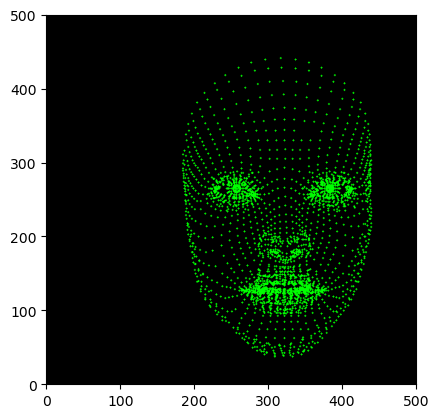

In [25]:
image = load_face_row_image(pandas_row, TRAIN_PATH)
out_image = cv2.cvtColor(blank_image, cv2.COLOR_RGBA2RGB)
# Add keypoints to the image
for x, y in keypoints:
    # Draw a circle at each keypoint (coordinates should be integers)
    cv2.circle(blank_image, (int(x), int(y)), 1, (0, 255, 0), -1)
plt.xlim(0,500)
plt.ylim(0,500)
plt.imshow(blank_image)
# plt.imshow(out_image)

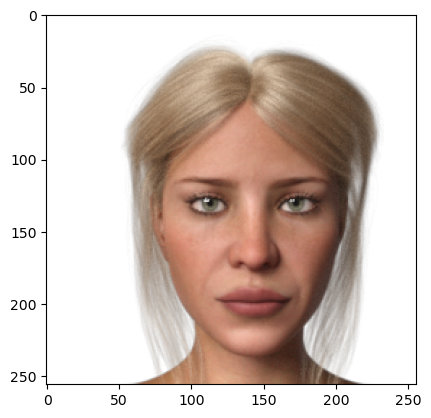

In [17]:
plt.imshow(image)

In [80]:
import os
from torch.utils.data import Dataset
from preprocessing import apply_eyebrow_mask
import torch.nn as nn
import torch
import cv2
import pandas as pd
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

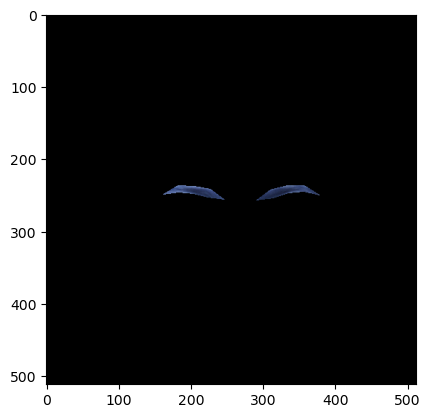

In [72]:
image = load_face_image(5, 2, "Front", PARAM_PATH)
mask=apply_eyebrow_mask(image)
maskk = cv2.cvtColor(mask, cv2.COLOR_RGBA2RGB)
plt.imshow(maskk)

In [63]:
row=df.iloc[0]
print(row["camera_type"])
print(row['Brows Arch'])
print(row['Brows Centre Depth'])

Front
-0.6
-0.8


In [73]:
class FacialDataset(Dataset):
    def __init__(self, df,TRAIN_PATH, transform=None):
        self.df = df
        self.train_path=TRAIN_PATH
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self,idx):
        row = self.df.iloc[idx]
        image = load_face_row_image(row, self.train_path)
        camera_type=row["camera_type"]
        brows_arch=row['Brows Arch']
        brows_centre_depth=row['Brows Centre Depth']
        mask=apply_eyebrow_mask(image)
        if self.transform:
            mask_image = self.transform(mask)
        
            # mask = self.transform(mask)
        return mask_image, camera_type, brows_arch, brows_centre_depth

In [74]:
# aaa=FacialDataset(df, TRAIN_PATH)

In [78]:
class MultiTaskUNet(nn.Module):
    def __init__(self):
        super(MultiTaskUNet, self).__init__()
        # Define encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            # Add more layers as needed
        )
        # Define shared layers
        self.shared = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Define regression heads
        self.fc_brows_arch = nn.Linear(128 * 16 * 16, 1)
        self.fc_brows_centre_depth = nn.Linear(128 * 16 * 16, 1)
        # Define classification head
        self.fc_camera_type = nn.Linear(128 * 16 * 16, 3)  # Assuming 3 classes for camera_type

    def forward(self, x):
        x = self.encoder(x)
        x = self.shared(x)
        x_flat = torch.flatten(x, 1)
        brows_arch = self.fc_brows_arch(x_flat)
        brows_centre_depth = self.fc_brows_centre_depth(x_flat)
        camera_type = self.fc_camera_type(x_flat)
        return brows_arch, brows_centre_depth, camera_type

In [79]:
def train_model(model, optimizer, dataloaders, device, num_epochs=25):
    regression_criterion = nn.MSELoss()
    classification_criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            for inputs, camera_type, brows_arch, brows_centre_depth in dataloaders[phase]:
                inputs = inputs.to(device)
                camera_type = camera_type.to(device)
                brows_arch = brows_arch.to(device)
                brows_centre_depth = brows_centre_depth.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    arch_pred, centre_pred, camera_pred = model(inputs)
                    loss_arch = regression_criterion(arch_pred, brows_arch)
                    loss_centre = regression_criterion(centre_pred, brows_centre_depth)
                    loss_camera = classification_criterion(camera_pred, camera_type)

                    total_loss = loss_arch + loss_centre + loss_camera

                    if phase == 'train':
                        total_loss.backward()
                        optimizer.step()

                running_loss += total_loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            print(f'{phase} Loss: {epoch_loss:.4f}')

    return model

In [ ]:
def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    le = LabelEncoder()
    df['camera_type'] = le.fit_transform(df['camera_type'])

    data_transforms = {
        'train': transforms.Compose([
            transforms.ToTensor(),
        ]),
        'val': transforms.Compose([
            transforms.ToTensor(),
        ]),
    }

    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
    image_datasets = {
        'train': FacialDataset(train_df, TRAIN_PATH, transform=data_transforms['train']),
        'val': FacialDataset(val_df, TRAIN_PATH, transform=data_transforms['val'])
    }

    dataloaders = {
        'train': DataLoader(image_datasets['train'], batch_size=4, shuffle=True),
        'val': DataLoader(image_datasets['val'], batch_size=4, shuffle=False)
    }

    model = MultiTaskUNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model = train_model(model, optimizer, dataloaders, device)

    torch.save(model.state_dict(), 'model.pth')

if __name__ == '__main__':
    main()